In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open(f"scheduler.obj", 'rb') as f:
    (best_train_accs, best_val_accs, best_train_losses, best_val_losses, best_epochs, all_train_accs, all_train_losses, all_val_accs, all_val_losses) = pickle.load(f)


In [2]:
schedulers = best_train_accs.keys()
schedulers

dict_keys(['linear', 'polynomial', 'inverse_sqrt', 'cosine', 'cosine_with_restarts'])

In [3]:
for scheduler in schedulers:
    for seed in range(len(all_train_accs[scheduler])):
        pass
        #print(best_val_acc[scheduler][seed])


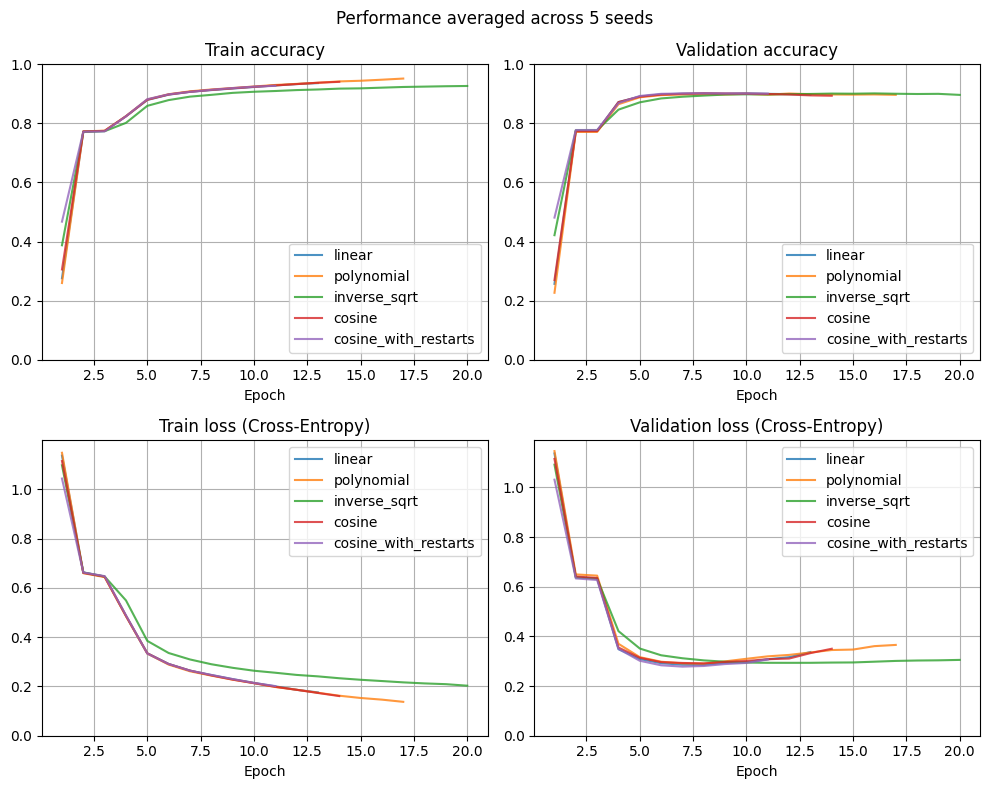

In [4]:
def aggregate_over_seeds(data):
    max_epochs = np.max([np.max(len(seed_data)) for seed_data in data])

    epoch_aggregates = np.empty((max_epochs, len(data)))
    epoch_aggregates[:] = np.nan

    for seed, seed_data in enumerate(data):
        for epoch, epoch_data in enumerate(seed_data):
            epoch_aggregates[epoch, seed] = epoch_data

    means = np.nanmean(epoch_aggregates, axis=1)
    mins = np.nanmin(epoch_aggregates, axis=1)
    maxs = np.nanmax(epoch_aggregates, axis=1)

    return epoch_aggregates, means, mins, maxs

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0][0].set_title("Train accuracy")
ax[0][0].set_ylim([0, 1])
ax[0][1].set_title("Validation accuracy")
ax[0][1].set_ylim([0, 1])
ax[1][0].set_title("Train loss (Cross-Entropy)")
ax[1][1].set_title("Validation loss (Cross-Entropy)")
max_epoch = 0
for scheduler in schedulers:
    _, means, mins, maxs = aggregate_over_seeds(all_train_accs[scheduler])
    
    epoch_axis = range(1, len(means)+1)
    ax[0][0].plot(epoch_axis, means, label=scheduler, alpha=0.8)
    max_epoch = np.max([max_epoch, len(means+1)])

    _, means, mins, maxs = aggregate_over_seeds(all_val_accs[scheduler])
    epoch_axis = range(1, len(means)+1)
    ax[0][1].plot(epoch_axis, means, label=scheduler, alpha=0.8)
    max_epoch = np.max([max_epoch, len(means+1)])

    _, means, mins, maxs = aggregate_over_seeds(all_train_losses[scheduler])
    epoch_axis = range(1, len(means)+1)
    ax[1][0].plot(epoch_axis, means, label=scheduler, alpha=0.8)
    max_epoch = np.max([max_epoch, len(means+1)])

    _, means, mins, maxs = aggregate_over_seeds(all_val_losses[scheduler])
    epoch_axis = range(1, len(means)+1)
    ax[1][1].plot(epoch_axis, means, label=scheduler, alpha=0.8)
    max_epoch = np.max([max_epoch, len(means+1)])

ax[1][0].set_ylim(bottom=0)
ax[1][1].set_ylim(bottom=0)
for ax in ax.flatten():
    ax.legend()
    ax.set_xlabel("Epoch")
    ax.grid()
plt.suptitle("Performance averaged across 5 seeds")
plt.tight_layout()
plt.show()

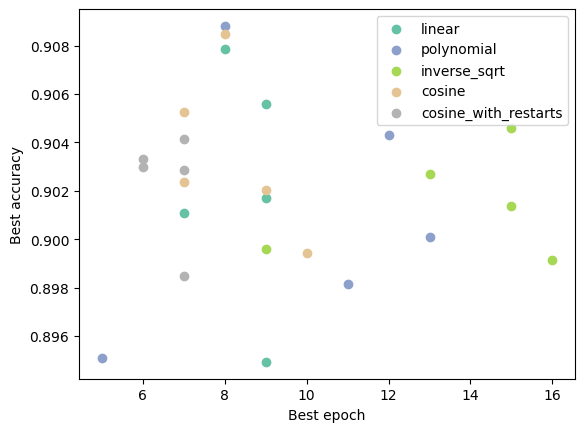

In [5]:
#plt.style.use('seaborn-v0_8-poster')
from matplotlib.patches import Ellipse

colors = iter(plt.cm.Set2(np.linspace(0, 1, len(schedulers))))
for scheduler in schedulers:
    color = next(colors)
    plt.scatter(best_epochs[scheduler], best_val_accs[scheduler], label=scheduler, color=color)
    mean_best_epoch = np.mean(best_epochs[scheduler])
    mean_best_val_acc = np.mean(best_val_accs[scheduler])
    """
    plt.gca().add_patch(Ellipse(
        xy=(mean_best_epoch, mean_best_val_acc),
        width=np.max(np.abs(best_epochs[scheduler]-mean_best_epoch)),
        height=np.max(np.abs(best_val_accs[scheduler]-mean_best_val_acc)),
        alpha=0.3,
        color=color
    ))
    """
    plt.legend()

plt.xlabel("Best epoch")
plt.ylabel("Best accuracy")
plt.show()

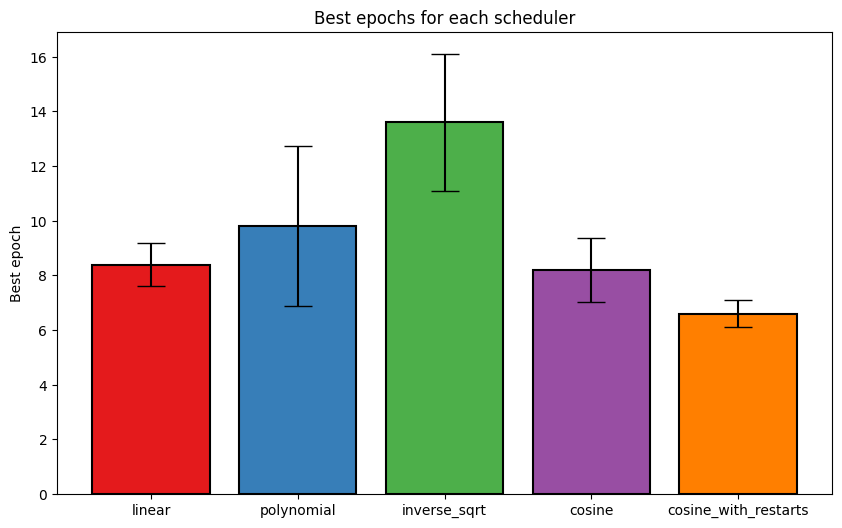

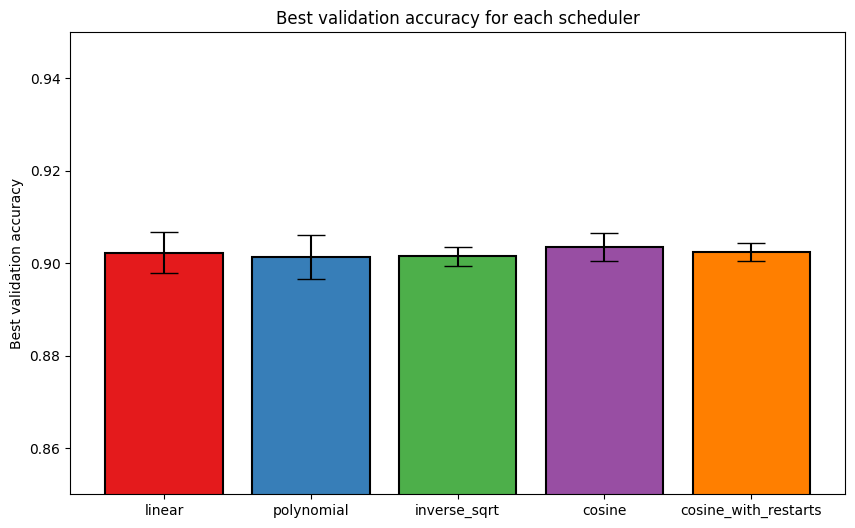

In [6]:

import seaborn as sns
import matplotlib

color_palette = sns.color_palette("Set1", n_colors=len(schedulers))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
means = [np.mean(best_epochs[s]) for s in schedulers]
stds = [np.std(best_epochs[s]) for s in schedulers]
ax.bar(schedulers, means, yerr=stds, edgecolor='k', capsize=10, linewidth=1.5, color=color_palette)
ax.set_title("Best epochs for each scheduler")
ax.set_ylabel("Best epoch")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

means = [np.mean(best_val_accs[s]) for s in schedulers]
stds = [np.std(best_val_accs[s]) for s in schedulers]
ax.bar(schedulers, means, yerr=stds, edgecolor='k', capsize=10, linewidth=1.5, color=color_palette)
ax.set_ylim([0.85, 0.95])
ax.set_ylabel("Best validation accuracy")
ax.set_title("Best validation accuracy for each scheduler")
plt.show()